In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
import seaborn as sns
from scipy.special import expit as logit

df_cleaned = pd.read_csv('/data/ortho/AllPatients.csv',  sep= ';')
#df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
#df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
#df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
#df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
#df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
#df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
#df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
#df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
#df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
#df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

#df_cleaned = df_cleaned.values

# x is naar voren
# y is omhoog
# z is opzij
print(df_cleaned.columns.values)
print(df_cleaned['Oorsprong'])

['Unnamed: 0' 'thorax_r_x' 'thorax_r_y' 'thorax_r_z' 'clavicula_r_x'
 'clavicula_r_y' 'clavicula_r_z' 'scapula_r_x' 'scapula_r_y' 'scapula_r_z'
 'humerus_r_x' 'humerus_r_y' 'humerus_r_z' 'ellebooghoek_r' '13' '14'
 'thorax_l_x' 'thorax_l_y' 'thorax_l_z' 'clavicula_l_x' 'clavicula_l_y'
 'clavicula_l_z' 'scapula_l_x' 'scapula_l_y' 'scapula_l_z' 'humerus_l_x'
 'humerus_l_y' 'humerus_l_z' 'ellebooghoek_l' '28' '29' 'Oorsprong']
0          Cat3_pat38_meting2_oef6.csv
1          Cat3_pat38_meting2_oef6.csv
2          Cat3_pat38_meting2_oef6.csv
3          Cat3_pat38_meting2_oef6.csv
4          Cat3_pat38_meting2_oef6.csv
5          Cat3_pat38_meting2_oef6.csv
6          Cat3_pat38_meting2_oef6.csv
7          Cat3_pat38_meting2_oef6.csv
8          Cat3_pat38_meting2_oef6.csv
9          Cat3_pat38_meting2_oef6.csv
10         Cat3_pat38_meting2_oef6.csv
11         Cat3_pat38_meting2_oef6.csv
12         Cat3_pat38_meting2_oef6.csv
13         Cat3_pat38_meting2_oef6.csv
14         Cat3_pat38_meti

In [2]:

df_cleaned['clavicula_x_dif'] = np.absolute(df_cleaned['clavicula_l_x'] - df_cleaned['clavicula_r_x'])
df_cleaned['clavicula_y_dif'] = np.absolute(df_cleaned['clavicula_l_y'] - df_cleaned['clavicula_r_y'])
df_cleaned['clavicula_z_dif'] = np.absolute(df_cleaned['clavicula_l_z'] - df_cleaned['clavicula_r_z'])

df_cleaned['scapula_x_dif'] = np.absolute(df_cleaned['scapula_l_x'] - df_cleaned['scapula_r_x'])
df_cleaned['scapula_y_dif'] = np.absolute(df_cleaned['scapula_l_y'] - df_cleaned['scapula_r_y'])
df_cleaned['scapula_z_dif'] = np.absolute(df_cleaned['scapula_l_z'] - df_cleaned['scapula_r_z'])

df_cleaned['humerus_x_dif'] = np.absolute(df_cleaned['humerus_l_x'] - df_cleaned['humerus_r_x'])
df_cleaned['humerus_y_dif'] = np.absolute(df_cleaned['humerus_l_y'] - df_cleaned['humerus_r_y'])
df_cleaned['humerus_z_dif'] = np.absolute(df_cleaned['humerus_l_z'] - df_cleaned['humerus_r_z'])


#df_cleaned['clavicula_z_dif'] = np.absolute(df_cleaned['clavicula_l_z'] - df_cleaned['clavicula_r_z'])

paramaters = ['clavicula_x_dif','clavicula_y_dif','clavicula_z_dif', 'scapula_x_dif','scapula_y_dif','scapula_z_dif',\
         'humerus_x_dif', 'humerus_y_dif', 'humerus_z_dif']

param = ['bias']
param.extend(paramaters)


df_cleaned['bias'] = 1
df_cleaned['c4'] = ['Cat4' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c3'] = ['Cat3' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c2'] = ['Cat2' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c1'] = ['Cat1' in vincent for vincent in df_cleaned['Oorsprong']]


X = np.matrix(df_cleaned[param])


# print(df_cleaned[['Oorsprong','c4']])
print(df_cleaned.head())

   Unnamed: 0  thorax_r_x  thorax_r_y  thorax_r_z  clavicula_r_x  \
0           0    6.357284    1.974308   -0.111658     -32.969301   
1           1    5.886164    1.985887   -0.111757     -33.037978   
2           2    5.886164    1.985887   -0.111757     -33.313334   
3           3    5.886164    1.985887   -0.111757     -33.207766   
4           4    5.886164    1.985887   -0.111757     -33.287265   

   clavicula_r_y  clavicula_r_z  scapula_r_x  scapula_r_y  scapula_r_z  ...    \
0      11.101866      -5.434937    19.738314    -4.577091    -9.564550  ...     
1      10.967154      -5.027487    19.771589    -4.303593    -9.098071  ...     
2      10.999874      -4.975565    19.771589    -4.303593    -9.098071  ...     
3      10.804187      -4.995478    19.562484    -4.263264    -9.139127  ...     
4      11.006292      -4.980487    19.616639    -3.703532    -9.139807  ...     

   scapula_y_dif  scapula_z_dif  humerus_x_dif  humerus_y_dif  humerus_z_dif  \
0       0.304589       2

<IPython.core.display.Javascript object>


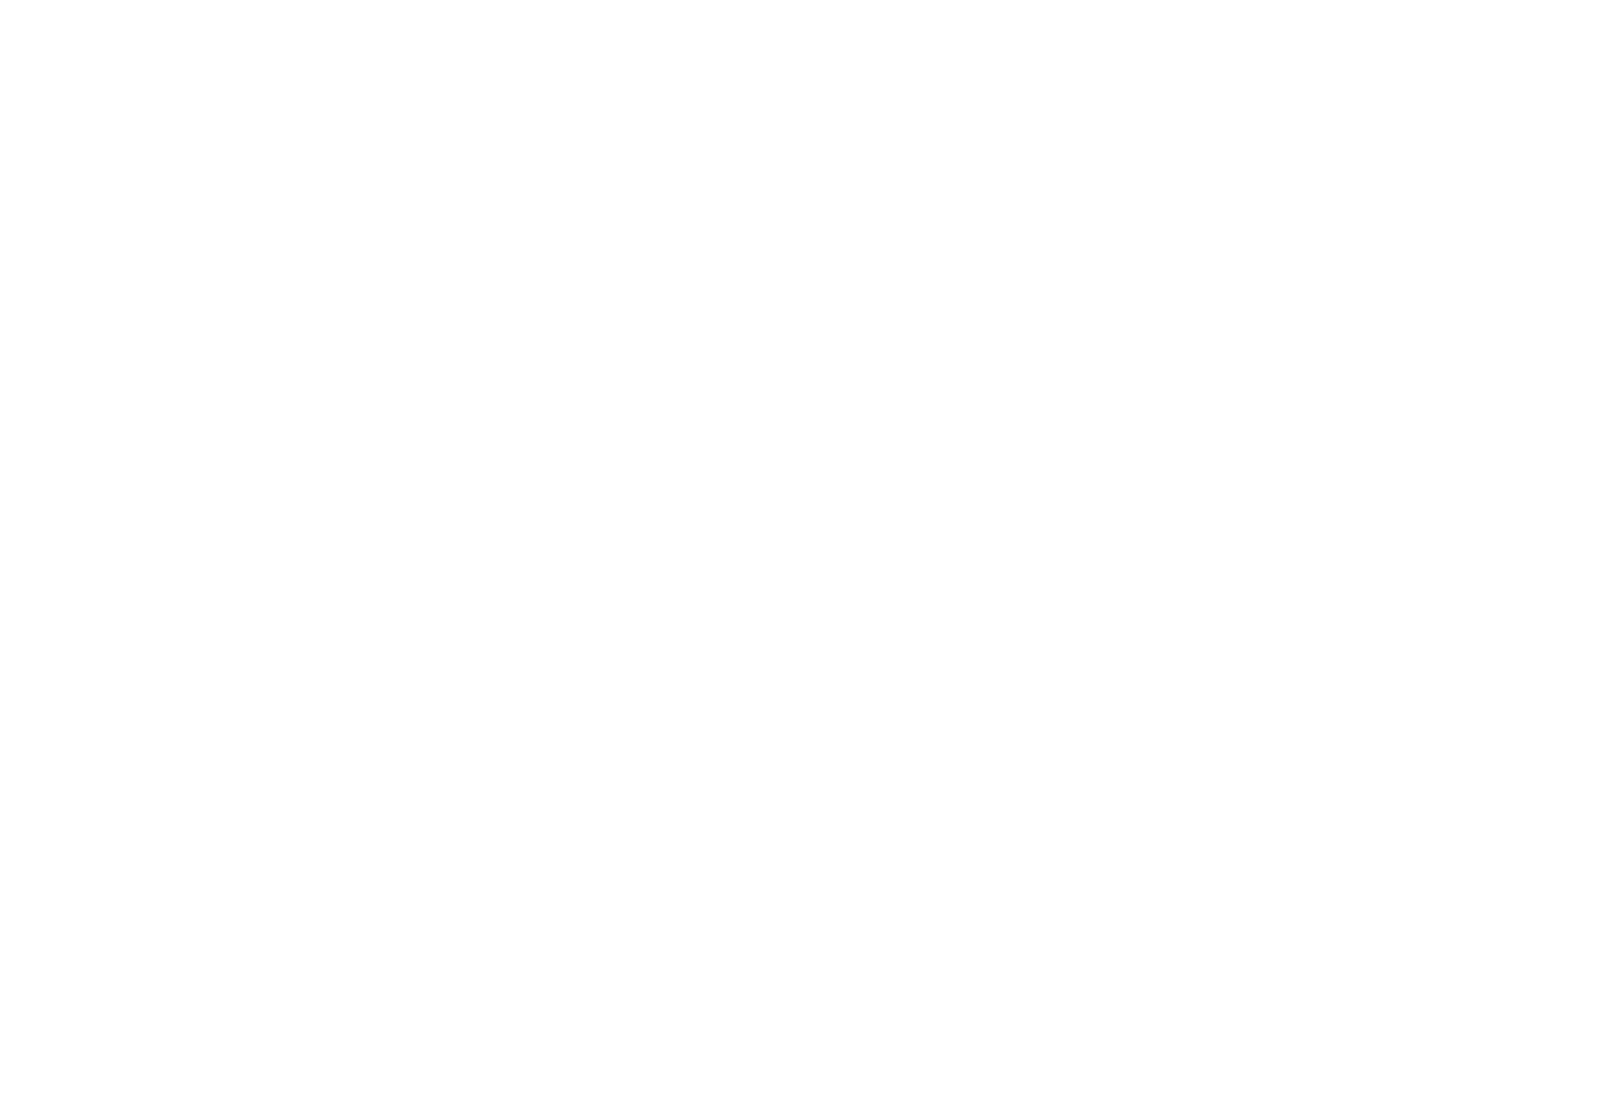

In [3]:
def scatter():
    cat4 = df_cleaned.where(df_cleaned['c4'])
    cat3 = df_cleaned.where(df_cleaned['c3'])
    cat2 = df_cleaned.where(df_cleaned['c2'])
    cat1 = df_cleaned.where(df_cleaned['c1'])

    plt.plot(cat3[param[1]], cat3[param[2]], '.', color='red', markersize=2)
    plt.plot(cat1[param[1]], cat1[param[2]], '.', color='cyan', markersize=2)
    plt.plot(cat2[param[1]], cat2[param[2]], '.', color='green', markersize=2)
    plt.plot(cat4[param[1]], cat4[param[2]], '.', color='blue', markersize=2)
    plt.title(param[1]+'/'+param[2])
    plt.ylabel(param[2])
    plt.xlabel(param[1]);
    #plt.xlim(-4000,4000)
    #plt.ylim(-3500,3500)
scatter()


In [4]:
def logit(z):
    return 1.0 / (1.0 + np.exp(-z))

def h(X, theta):
    return logit(X * theta)

def predict(X, theta):
    return h(X, theta) >= 0.5

def fit_model(X, y, alpha=0.00001, iterations=50000):
    ErrerPerIter = []
    m = X.shape[1]            # het aantal coefficienten
    print(m)
    theta = np.zeros((m, 1))  # initialiseer theta
    for iter in range(iterations):
        theta -= (alpha / m) * X.T * ( h(X, theta) - y )
        if(iter % 100 == 0):
            ErrerPerIter.append(evaluate(theta, X, y).item(0))
    return (theta, ErrerPerIter)

def evaluate(theta, X, y):
    return sum( predict(X, theta) == y ) / len(X)

def plot_decision_boundary(theta2, colorpref):
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    X = np.matrix(np.vstack([np.ones(xx.shape[0] * xx.shape[1]), xx.ravel(), yy.ravel()])).T
    boundary = logit(X * theta2)
    boundary = boundary.reshape(xx.shape)
    
    ax.contour(xx, yy,
           boundary,
           levels=[0.5], colors=colorpref)
    

In [5]:
theta = []
Learningrate = []
CategorieAmount = ['c1', 'c2', 'c3', 'c4']
Colors = ['cyan', 'green', 'red', 'blue']
y =  []
for i in CategorieAmount:
    y.append(np.matrix(df_cleaned[[i]]))

for num, i in enumerate(CategorieAmount):
    print('Categorie: %s' % i)
    %%time
    thetatmp, Learningratetmp = fit_model(X, y[num])
    theta.append(thetatmp)
    Learningrate.append(Learningratetmp)
    print(theta[num])


Categorie: c1
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs
10


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[-0.48970498]
 [-0.1588529 ]
 [ 0.31374887]
 [-0.42314976]
 [ 0.64090794]
 [ 0.47071498]
 [-0.29765655]
 [-0.34786717]
 [-0.70467306]
 [-0.24706829]]
Categorie: c2
CPU times: user 103 µs, sys: 1e+03 ns, total: 104 µs
Wall time: 7.39 µs
10


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[ 10.77335775]
 [ -0.31524464]
 [ -0.76385233]
 [ -0.19862729]
 [ -0.9093362 ]
 [  0.11962846]
 [ -0.62332287]
 [ -0.37172473]
 [ -0.45689703]
 [ -0.7490737 ]]
Categorie: c3
CPU times: user 89 µs, sys: 1e+03 ns, total: 90 µs
Wall time: 22.4 µs
10


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[-1.76884333]
 [ 0.82110484]
 [ 0.60866765]
 [ 0.77562146]
 [-0.71664916]
 [-1.45982331]
 [ 0.80700722]
 [ 0.48003884]
 [ 0.77478254]
 [ 0.48664284]]
Categorie: c4
CPU times: user 130 µs, sys: 1e+03 ns, total: 131 µs
Wall time: 6.44 µs
10


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[[-8.04284964]
 [-0.39615282]
 [-0.28732454]
 [-0.24121773]
 [-0.08752197]
 [-0.12593433]
 [-0.19393875]
 [-0.78684417]
 [-0.12245506]
 [-0.76652797]]


In [6]:
for num, i in enumerate(CategorieAmount):
    print('Evaluating Categorie: %s' % i)
    print(evaluate(theta[num], X, y[num]))

Evaluating Categorie: c1
[[ 0.75361203]]
Evaluating Categorie: c2
[[ 0.59723753]]
Evaluating Categorie: c3
[[ 0.38559621]]
Evaluating Categorie: c4
[[ 0.94095345]]


<IPython.core.display.Javascript object>


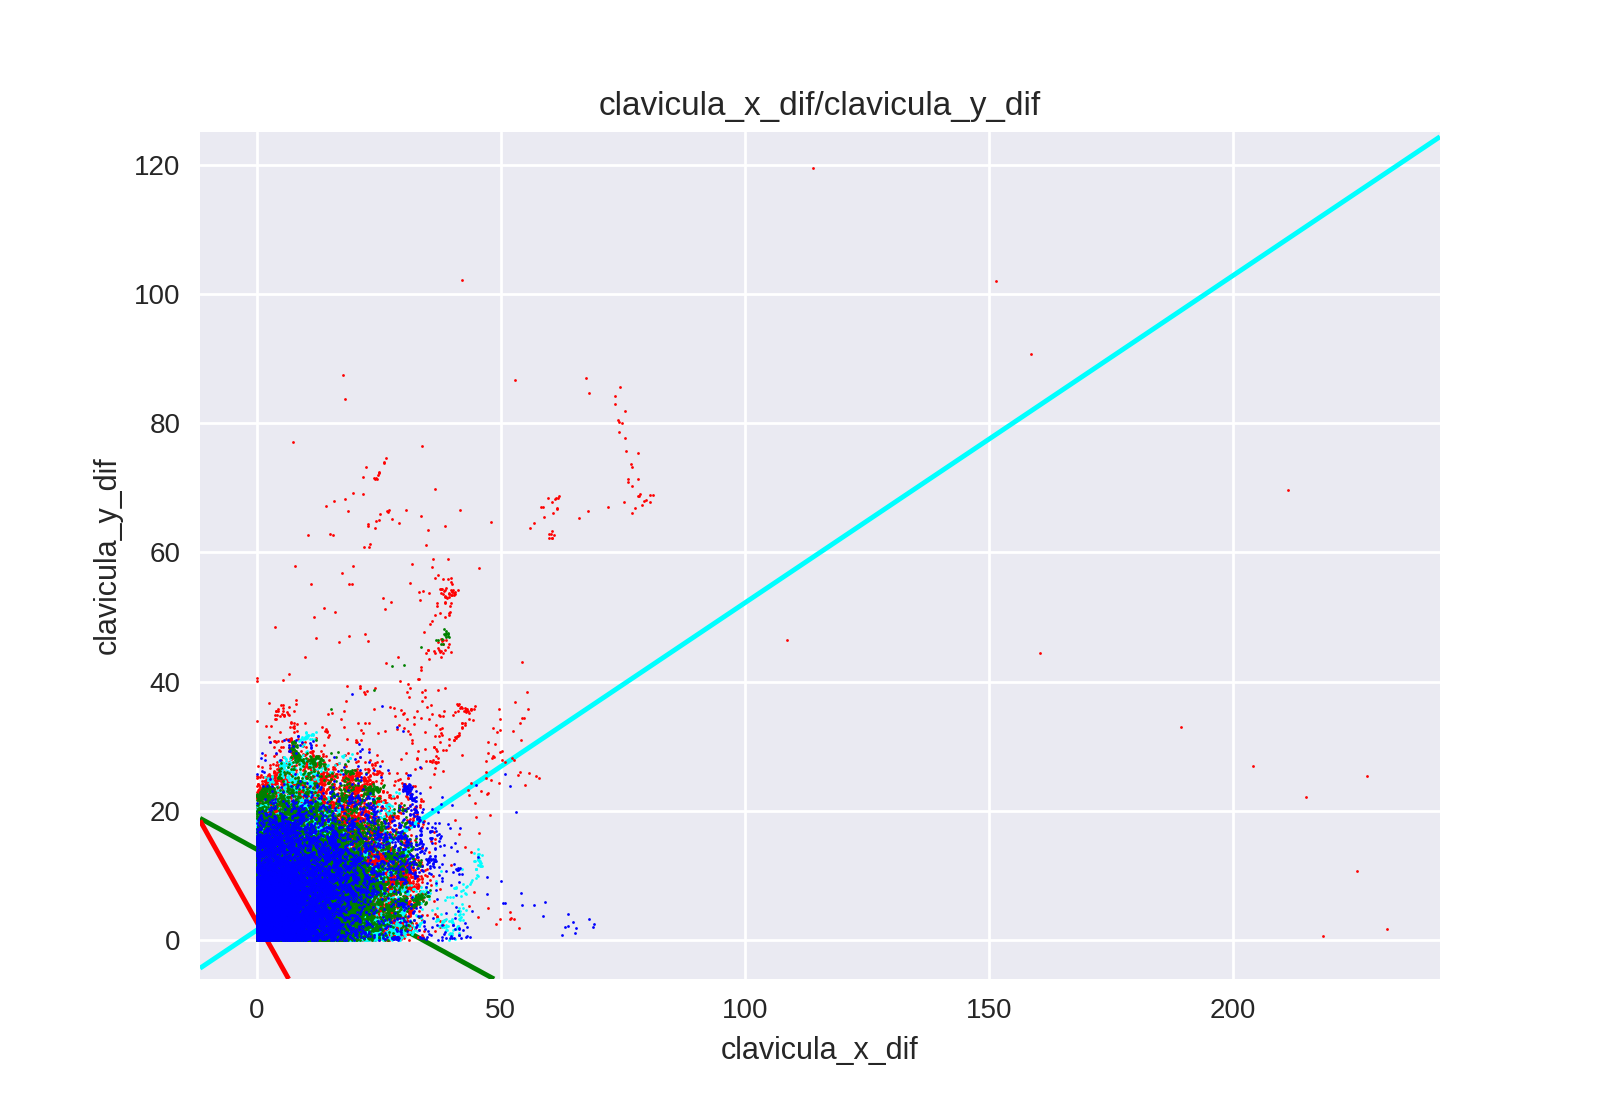

c1 cyan
[[-0.48970498]
 [-0.1588529 ]
 [ 0.31374887]]
c2 green
[[ 10.77335775]
 [ -0.31524464]
 [ -0.76385233]]
c3 red
[[-1.76884333]
 [ 0.82110484]
 [ 0.60866765]]
c4 blue
[[-8.04284964]
 [-0.39615282]
 [-0.28732454]]


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [10]:
plt.close()
scatter()
for num, i in enumerate(CategorieAmount):
    print(i, Colors[num])
    print(theta[num][0:3])
    plot_decision_boundary(theta[num][0:3], Colors[num])

In [8]:
for num, i in enumerate(CategorieAmount):
    print('\n Information %s' % i)
    x = predict(X, theta[num])
    TP = 0
    for i in range(x.shape[0]):
        if x[i] == y[num][i] == True:
            TP = TP+1

    TN = 0
    for i in range(x.shape[0]):
        if x[i] == y[num][i] == False:
            TN = TN+1

    FP = 0
    for i in range(x.shape[0]):
        if (x[i] == True) and (y[num][i] == False):
            FP = FP+1

    FN = 0
    for i in range(x.shape[0]):
        if (x[i] == False) and (y[num][i] == True):
            FN = FN+1

    tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
    print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
    print()
    try:
        print("recall", TP/(TP+FN))
        print("precision", TP/(TP+FP))
        print("accuracy", (TP+TN)/(TP+TN+FP+FN))
    except:
        pass


 Information c1
               pos     neg
0  pred pos  10036   18843
1  pred neg  23398  119164

recall 0.30017347610217143
precision 0.34751895841268743
accuracy 0.7536120297945066

 Information c2
               pos     neg
0  pred pos    386     596
1  pred neg  68454  102005

recall 0.005607205113306217
precision 0.39307535641547864
accuracy 0.5972375336121465

 Information c3
               pos     neg
0  pred pos  55514  101804
1  pred neg   3530   10593

recall 0.9402140776370165
precision 0.35287761095360987
accuracy 0.3855962109413734

 Information c4
               pos     neg
0  pred pos      0       0
1  pred neg  10123  161318

recall 0.0


<IPython.core.display.Javascript object>


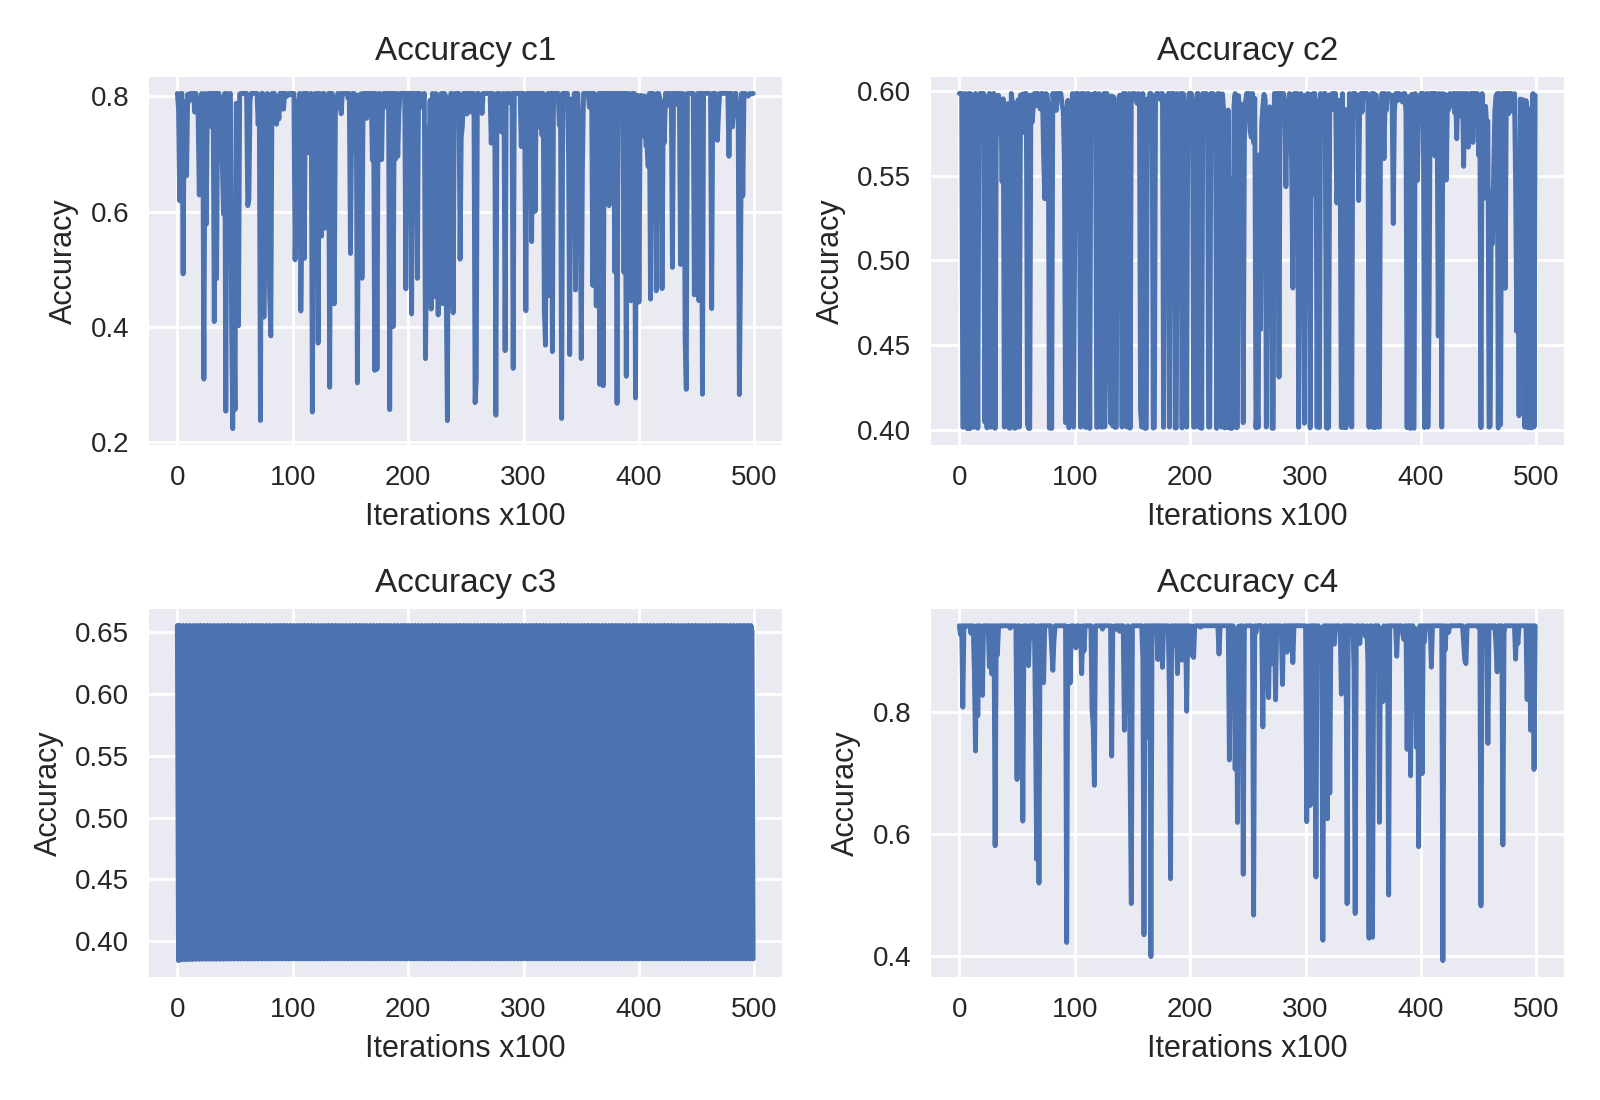

In [9]:

plt.close()
plt.clf()
for num, i in enumerate(CategorieAmount):
    plt.subplot(2,2,num+1)
    plt.plot(Learningrate[num])
    plt.xlabel('Iterations x100')
    plt.ylabel('Accuracy')
    plt.title('Accuracy %s' % i)
plt.tight_layout()
plt.show()